In [53]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Read File1.txt

In [8]:
file=pd.read_csv(r'Irish_DataSet\File1.txt',header=None,delimiter=" ")
file.rename(columns={0: "ID", 1: "Timestamp", 2: "Consumption"},inplace=True)
def is_valid_integer(value):
    try:
        int(value)
        return True
    except ValueError:
        return False
    
def convert_day_to_date(day):
    base_date = datetime(2009, 1, 1)
    converted_date = base_date + timedelta(days=day - 195) 
    return converted_date

In [9]:
file["Day"]= file["Timestamp"].apply(lambda x: str(x)[:3] if is_valid_integer(str(x)) else None)
file["Time"]=file["Timestamp"].apply(lambda x: str(x)[3:] if is_valid_integer(str(x)) else None)

In [10]:
file['Timestamp'] = pd.to_numeric(file['Timestamp'], errors='coerce', downcast='integer')
file['Day'] = pd.to_numeric(file['Day'], errors='coerce', downcast='integer')
file['Time'] = pd.to_numeric(file['Time'], errors='coerce', downcast='integer')

In [11]:
timestamp_to_delete = 'Timestamp'
if timestamp_to_delete in file.columns:
    file.drop(columns=[timestamp_to_delete], inplace=True)
file.head()

,ID,Consumption,Day,Time
0,1392,0.140,195,3
1,1392,0.138,195,4
2,1392,0.140,195,5
3,1392,0.145,195,6
4,1392,0.145,195,7


In [12]:
file['Date'] = file['Day'].apply(convert_day_to_date)

In [13]:
file['DayOfWeek'] = file['Date'].dt.strftime('%A')
file

,ID,Consumption,Day,Time,Date,DayOfWeek
0,1392,0.140,195,3,2009-01-01,Thursday
1,1392,0.138,195,4,2009-01-01,Thursday
2,1392,0.140,195,5,2009-01-01,Thursday
3,1392,0.145,195,6,2009-01-01,Thursday
4,1392,0.145,195,7,2009-01-01,Thursday
...,...,...,...,...,...,...
24465833,1703,0.176,730,44,2010-06-20,Sunday
24465834,1703,0.204,730,45,2010-06-20,Sunday
24465835,1703,0.178,730,46,2010-06-20,Sunday
24465836,1703,0.176,730,47,2010-06-20,Sunday


## SME , Residential and Other allocations

In [14]:
res_allocation=pd.read_excel('Irish_DataSet\\SME and Residential allocations.xlsx')
res_allocation.dtypes
res_allocation.head()

,ID,Code,Residential - Tariff allocation,Residential - stimulus allocation,SME allocation
0,1000,3,NaN,NaN,NaN
1,1001,3,NaN,NaN,NaN
2,1002,1,E,E,NaN
3,1003,1,A,4,NaN
4,1004,1,A,2,NaN


## Remove SME allocation

In [15]:
SME_to_delete = 'SME allocation'
if SME_to_delete in res_allocation.columns:
    res_allocation.drop(columns=[SME_to_delete], inplace=True)
res_allocation

,ID,Code,Residential - Tariff allocation,Residential - stimulus allocation
0,1000,3,NaN,NaN
1,1001,3,NaN,NaN
2,1002,1,E,E
3,1003,1,A,4
4,1004,1,A,2
...,...,...,...,...
6440,7440,1,A,3
6441,7441,1,E,E
6442,7442,1,D,3
6443,7443,1,A,4


## Filter Residential allocation

In [16]:
filtered_res_allocation = res_allocation[res_allocation['Code'] == 1]
filtered_res_allocation

,ID,Code,Residential - Tariff allocation,Residential - stimulus allocation
2,1002,1,E,E
3,1003,1,A,4
4,1004,1,A,2
5,1005,1,D,4
6,1006,1,C,3
...,...,...,...,...
6438,7438,1,B,1
6440,7440,1,A,3
6441,7441,1,E,E
6442,7442,1,D,3


## Check NAN value 

In [17]:
fetch_column1=filtered_res_allocation['Residential - Tariff allocation']
fetch_column1.isna().sum()

fetch_column2=filtered_res_allocation['Residential - stimulus allocation']
fetch_column2.isna().sum()

0

In [18]:
label_encoder = LabelEncoder()

fetch_column3=filtered_res_allocation.loc[:,'Residential - Tariff allocation']
fetch_column3

fetch_column4=filtered_res_allocation.loc[:,'Residential - stimulus allocation']
fetch_column4

filtered_res_allocation.loc[:, 'Residential - Tariff allocation'] = label_encoder.fit_transform(filtered_res_allocation['Residential - Tariff allocation'])
filtered_res_allocation.loc[:, 'Residential - stimulus allocation'] = label_encoder.fit_transform(filtered_res_allocation['Residential - stimulus allocation'])

C:\Users\HP\AppData\Local\Temp\ipykernel_15024\3020282465.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_res_allocation.loc[:, 'Residential - Tariff allocation'] = label_encoder.fit_transform(filtered_res_allocation['Residential - Tariff allocation'])
C:\Users\HP\AppData\Local\Temp\ipykernel_15024\3020282465.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  filtered_res_allocation.loc[:, 'Residential - Tariff allocation'] = label_encoder.fit_transform(filtered_res_allocation['Residential - Tariff allocation'

In [19]:
filtered_res_allocation

,ID,Code,Residential - Tariff allocation,Residential - stimulus allocation
2,1002,1,4,4
3,1003,1,0,3
4,1004,1,0,1
5,1005,1,3,3
6,1006,1,2,2
...,...,...,...,...
6438,7438,1,1,0
6440,7440,1,0,2
6441,7441,1,4,4
6442,7442,1,3,2


In [20]:
filtered_res_allocation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 2 to 6443
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   ID                                 4225 non-null   int64
 1   Code                               4225 non-null   int64
 2   Residential - Tariff allocation    4225 non-null   int32
 3   Residential - stimulus allocation  4225 non-null   int32
dtypes: int32(2), int64(2)
memory usage: 132.0 KB


## Check how filtered_res_allocation and file1 are related

In [21]:
file_common = file[file['ID'].isin(range(1392, 1704))]
filtered_res_allocation_common = filtered_res_allocation[filtered_res_allocation['ID'].isin(range(1392, 1704))]

res_file = pd.merge(file_common, filtered_res_allocation_common, on='ID')
res_file
# res_file=pd.merge(file, filtered_res_allocation, on='ID', how='inner')

,ID,Consumption,Day,Time,Date,DayOfWeek,Code,Residential - Tariff allocation,Residential - stimulus allocation
0,1491,0.837,196,40,2009-01-02,Friday,1,0,2
1,1491,0.069,196,41,2009-01-02,Friday,1,0,2
2,1491,0.023,196,42,2009-01-02,Friday,1,0,2
3,1491,0.470,196,34,2009-01-02,Friday,1,0,2
4,1491,1.017,196,35,2009-01-02,Friday,1,0,2
...,...,...,...,...,...,...,...,...,...
5093095,1533,0.042,730,44,2010-06-20,Sunday,1,3,0
5093096,1533,0.042,730,45,2010-06-20,Sunday,1,3,0
5093097,1533,0.042,730,46,2010-06-20,Sunday,1,3,0
5093098,1533,0.042,730,47,2010-06-20,Sunday,1,3,0


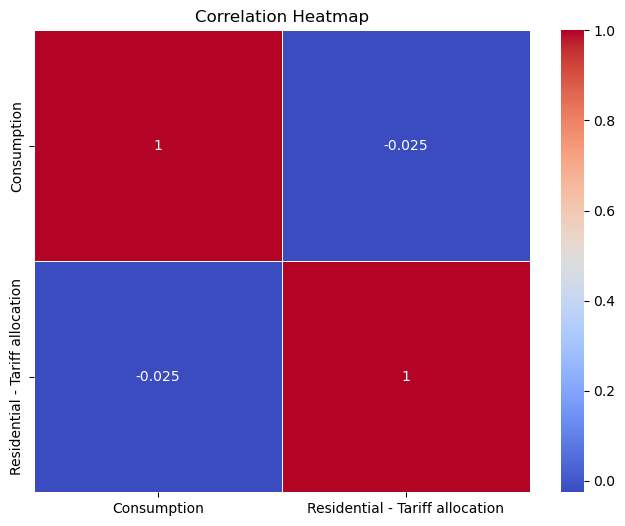

In [22]:
consumption_res_corr = res_file["Consumption"].corr(res_file["Residential - Tariff allocation"])
plt.figure(figsize=(8, 6))
sns.heatmap(res_file[["Consumption", "Residential - Tariff allocation"]].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

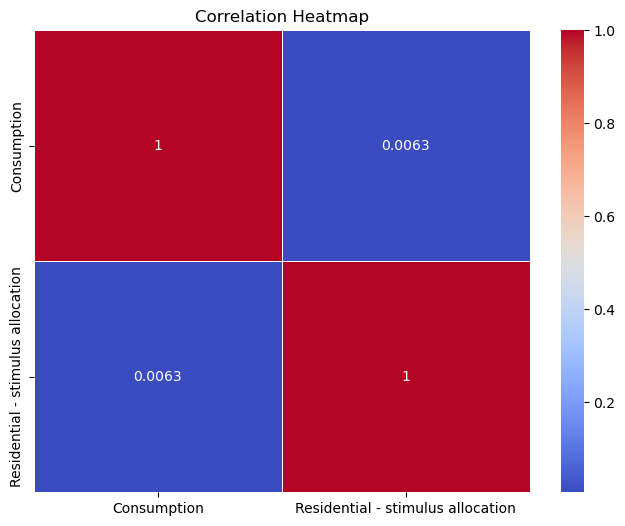

In [23]:
consumption_res_corr2 = res_file["Consumption"].corr(res_file["Residential - stimulus allocation"])
plt.figure(figsize=(8, 6))
sns.heatmap(res_file[["Consumption", "Residential - stimulus allocation"]].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Pre trial

In [24]:
res_pre_trial=pd.read_excel('Irish_DataSet\\Smart meters Residential pre-trial survey data.xlsx')
res_pre_trial.head()

,ID,Question 200: PLEASE RECORD SEX FROM VOICE,"Question 300: May I ask what age you were on your last birthday? INT: IF NECCESSARY, PROMPT WITH AGE BANDS","Question 310: What is the employment status of the chief income earner in your household, is he/she","Question 401: SOCIAL CLASS Interviewer, Respondent said that occupation of chief income earner was.... <CLASS> Please code",Question 405: Do you have internet access in your home?,Question 406: Do you have broadband in your home?,Question 407: Do you use the internet regularly yourself?,Question 408: Are there other people in your household that use the internet regularly?,Question 410: What best describes the people you live with? READ OUT,...,"Question 402: And considering income, what is the approximate income of your household - this should be before tax, you should include the income of all adults in the household? Please note that this figure will remain completely confidential and will not",Question 4021: Can you state which of the following broad categories best represents the yearly household income BEFORE TAX?,Question 403: Is that figure,Question 404: Can I just double check is that figure..,Question 55113: The number of suppliers competing in the market,Question 55114: The percentage of electricity being generated from renewable sources,Question 55115: The overall cost of electricity,Question 55116: The number of estimated bills received by customers,Question 55117: The opportunity to sell back extra electricity you may generate (from solar panels etc) to your electricity supplier,Question 55118: The environmental damage associated with the amount of electricity used
0,1002,1,6,6,4,2,,2,2,1,...,NaN,1,,,2,3,2,2,1,5
1,1003,1,2,1,2,1,1,1,1,3,...,3.0,,3,1,1,3,3,3,5,5
2,1004,1,4,1,2,1,1,1,1,2,...,6.0,,3,1,3,2,3,2,3,1
3,1005,2,3,1,2,1,1,1,1,2,...,NaN,6,,,5,3,4,2,2,5
4,1008,2,3,1,2,1,2,4,1,3,...,NaN,6,,,3,3,4,4,2,2


In [25]:
res_pre_trial.isnull().sum().sum()

2281

## Post Trial

In [25]:
res_post_trial=pd.read_excel('Irish_DataSet\\Smart meters Residential post-trial survey data.xlsx')
res_post_trial

,ID,Question 9002: GROUPS,Question 9003: GROUPS: OLR,Question 9003: GROUPS: IHD,Question 9003: GROUPS: USAGE STATEMENT MONTHLY,Question 9003: GROUPS: USAGE STATEMENT EVERY TWO MONTHS,Question 9003: GROUPS: NONE,Question 100001: GROUP,Question 100004: TARIFF,Question 100005: STIMULUS,...,Question 66202: The target set was reasonable,Question 66202: The target encouraged me [us] to reduce the amount of electricity overall,Question 66202: I understood what I needed to do to achieve the target,Question 66202: I [we] tried to meet the target,Question 66202: The 20 Euro incentive for meeting the target was reasonable given the effort required,Question 66202: It would have been easier to meet the target if I had additional information,Question 66212: A device for your home which shows how much electricity you are using and how much it costs at different times of day,Question 66212: A device for your home which allows you to look at your usage and the cost over the last week or longer periods,Question 66212: A web-site which you can login to view your usage and the cost over the last week or longer periods,Question 66212: A web-site which you can login to view your usage and the cost over the last week or longer periods and includes information on how much appliances cost to use and other advice on reducing usage
0,1002,1,0,0,0,0,1,1,3,1,...,,,,,,,,,,
1,1003,2,1,0,0,1,1,1,1,2,...,4,4,3,4,4,5,4,5,5,5
2,1004,2,0,0,1,0,1,1,2,1,...,,,,,,,,,,
3,1008,2,0,0,0,1,1,0,,,...,,,,,,,,,,
4,1014,1,0,0,0,0,1,1,4,2,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418,7436,1,0,0,0,0,1,1,1,2,...,,,,,,,,,,
3419,7437,1,0,0,0,0,1,0,,,...,,,,,,,,,,
3420,7441,1,0,0,0,0,1,1,3,2,...,,,,,,,,,,
3421,7442,2,0,1,0,1,1,1,3,4,...,,,,,,,,,,


In [30]:
res_post_trial.shape

(3423, 235)

In [26]:
res_post_trial.isna().sum().sum()

res_post_trial = res_post_trial.apply(pd.to_numeric, errors='coerce', downcast='integer')
column_data_types = res_post_trial.dtypes

object_count = (column_data_types == 'object').sum()
object_count

0

In [28]:
df1_common = res_file[res_file['ID'].isin(range(1491, 1534))]
df2_common = res_post_trial[res_post_trial['ID'].isin(range(1491, 1534))]
combined_df = pd.merge(df1_common, df2_common, on='ID')
combined_df

,ID,Consumption,Day,Time,Date,DayOfWeek,Code,Residential - Tariff allocation,Residential - stimulus allocation,Question 9002: GROUPS,...,Question 66202: The target set was reasonable,Question 66202: The target encouraged me [us] to reduce the amount of electricity overall,Question 66202: I understood what I needed to do to achieve the target,Question 66202: I [we] tried to meet the target,Question 66202: The 20 Euro incentive for meeting the target was reasonable given the effort required,Question 66202: It would have been easier to meet the target if I had additional information,Question 66212: A device for your home which shows how much electricity you are using and how much it costs at different times of day,Question 66212: A device for your home which allows you to look at your usage and the cost over the last week or longer periods,Question 66212: A web-site which you can login to view your usage and the cost over the last week or longer periods,Question 66212: A web-site which you can login to view your usage and the cost over the last week or longer periods and includes information on how much appliances cost to use and other advice on reducing usage
0,1491,0.837,196,40,2009-01-02,Friday,1,0,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1491,0.069,196,41,2009-01-02,Friday,1,0,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1491,0.023,196,42,2009-01-02,Friday,1,0,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1491,0.470,196,34,2009-01-02,Friday,1,0,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1491,1.017,196,35,2009-01-02,Friday,1,0,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617227,1492,0.249,730,44,2010-06-20,Sunday,1,4,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617228,1492,0.095,730,45,2010-06-20,Sunday,1,4,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617229,1492,0.032,730,46,2010-06-20,Sunday,1,4,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617230,1492,0.032,730,47,2010-06-20,Sunday,1,4,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Check NAN values

In [29]:
columns_with_only_nan = combined_df.columns[combined_df.isna().all()]

combined_df.drop(columns=columns_with_only_nan, inplace=True)
combined_df

,ID,Consumption,Day,Time,Date,DayOfWeek,Code,Residential - Tariff allocation,Residential - stimulus allocation,Question 9002: GROUPS,...,Question 66201: I [we] tried to meet the target,Question 66201: The 20 Euro incentive for meeting the target was reasonable given the effort required,Question 66201: It would have been easier to meet the target if I had additional information,Question 66202: The target was clearly communicated to me,Question 66202: The target set was reasonable,Question 66202: The target encouraged me [us] to reduce the amount of electricity overall,Question 66202: I understood what I needed to do to achieve the target,Question 66202: I [we] tried to meet the target,Question 66202: The 20 Euro incentive for meeting the target was reasonable given the effort required,Question 66202: It would have been easier to meet the target if I had additional information
0,1491,0.837,196,40,2009-01-02,Friday,1,0,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1491,0.069,196,41,2009-01-02,Friday,1,0,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1491,0.023,196,42,2009-01-02,Friday,1,0,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1491,0.470,196,34,2009-01-02,Friday,1,0,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1491,1.017,196,35,2009-01-02,Friday,1,0,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617227,1492,0.249,730,44,2010-06-20,Sunday,1,4,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617228,1492,0.095,730,45,2010-06-20,Sunday,1,4,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617229,1492,0.032,730,46,2010-06-20,Sunday,1,4,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617230,1492,0.032,730,47,2010-06-20,Sunday,1,4,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
combined_df= combined_df.fillna(0)
combined_df

,ID,Consumption,Day,Time,Date,DayOfWeek,Code,Residential - Tariff allocation,Residential - stimulus allocation,Question 9002: GROUPS,...,Question 66201: I [we] tried to meet the target,Question 66201: The 20 Euro incentive for meeting the target was reasonable given the effort required,Question 66201: It would have been easier to meet the target if I had additional information,Question 66202: The target was clearly communicated to me,Question 66202: The target set was reasonable,Question 66202: The target encouraged me [us] to reduce the amount of electricity overall,Question 66202: I understood what I needed to do to achieve the target,Question 66202: I [we] tried to meet the target,Question 66202: The 20 Euro incentive for meeting the target was reasonable given the effort required,Question 66202: It would have been easier to meet the target if I had additional information
0,1491,0.837,196,40,2009-01-02,Friday,1,0,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1491,0.069,196,41,2009-01-02,Friday,1,0,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1491,0.023,196,42,2009-01-02,Friday,1,0,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1491,0.470,196,34,2009-01-02,Friday,1,0,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1491,1.017,196,35,2009-01-02,Friday,1,0,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617227,1492,0.249,730,44,2010-06-20,Sunday,1,4,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
617228,1492,0.095,730,45,2010-06-20,Sunday,1,4,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
617229,1492,0.032,730,46,2010-06-20,Sunday,1,4,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
617230,1492,0.032,730,47,2010-06-20,Sunday,1,4,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
meter_days = combined_df.groupby('ID')['Day'].unique().to_dict()
min_day = combined_df['Day'].min()
max_day = combined_df['Day'].max()

missing_days = {}

for meter_id, days in meter_days.items():
    all_days = set(range(min_day, max_day + 1))
    missing = all_days - set(days)
    missing_days[meter_id] = sorted(list(missing))

for meter_id, missing_day_list in missing_days.items():
    print(f"Meter {meter_id} has {len(missing_day_list)} missing days:")
    print(missing_day_list)
    print()

Meter 1491 has 0 missing days:
[]

Meter 1492 has 0 missing days:
[]

Meter 1493 has 0 missing days:
[]

Meter 1494 has 0 missing days:
[]

Meter 1495 has 0 missing days:
[]

Meter 1497 has 0 missing days:
[]

Meter 1498 has 0 missing days:
[]

Meter 1499 has 0 missing days:
[]

Meter 1500 has 1 missing days:
[566]

Meter 1501 has 1 missing days:
[566]

Meter 1505 has 2 missing days:
[702, 703]

Meter 1506 has 1 missing days:
[566]

Meter 1507 has 0 missing days:
[]

Meter 1510 has 0 missing days:
[]

Meter 1512 has 1 missing days:
[566]

Meter 1514 has 0 missing days:
[]

Meter 1516 has 0 missing days:
[]

Meter 1517 has 0 missing days:
[]

Meter 1523 has 0 missing days:
[]

Meter 1527 has 0 missing days:
[]

Meter 1528 has 0 missing days:
[]

Meter 1529 has 0 missing days:
[]

Meter 1530 has 0 missing days:
[]

Meter 1531 has 0 missing days:
[]



In [33]:
zero_consumption_count = (combined_df['Consumption'] == 0).sum()
print(f"Number of zero consumption values: {zero_consumption_count}")

Number of zero consumption values: 4969


In [34]:
positive_consumption_count = (combined_df['Consumption'] > 0).sum()
print(f"Number of positive consumption values: {positive_consumption_count}")

Number of positive consumption values: 612263


In [35]:
negative_consumption_count = (combined_df['Consumption'] < 0).sum()
print(f"Number of negative consumption values: {negative_consumption_count}")

Number of negative consumption values: 0


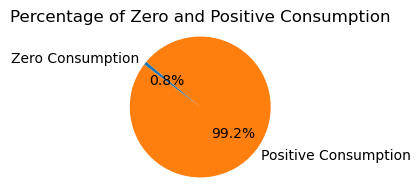

In [36]:
counts = [zero_consumption_count, positive_consumption_count]
labels = ['Zero Consumption', 'Positive Consumption']

plt.figure(figsize=(2, 2))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Zero and Positive Consumption')
plt.axis('equal')

plt.show()

In [38]:
unique_values = combined_df['ID'].nunique()
print("Unique Values in ID Column -",unique_values)

Unique Values in ID Column - 24


In [39]:
# first_100000_rows = combined_df.iloc[:100000, :]

# zero_consumption_count = (first_100000_rows['Consumption'] == 0).sum()
# print(f"Number of zero consumption values: {zero_consumption_count}")

# positive_consumption_count = (first_100000_rows['Consumption'] > 0).sum()
# print(f"Number of positive consumption values: {positive_consumption_count}")

# counts = [zero_consumption_count, positive_consumption_count]
# labels = ['Zero Consumption', 'Positive Consumption']

# plt.figure(figsize=(2, 2))
# plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
# plt.title('Percentage of Zero and Positive Consumption')
# plt.axis('equal')

# plt.show()

## Deal with NAN values

In [40]:
any_row_nan = combined_df.isna().any(axis=1)
num_rows_with_nan = any_row_nan.sum()

any_column_nan = combined_df.isna().any()
num_columns_with_nan = any_column_nan.sum()

print(f"Rows with NaN values: {num_rows_with_nan}")
print(f"Columns with NaN values: {num_columns_with_nan}")

Rows with NaN values: 0
Columns with NaN values: 0


In [41]:
columns_with_nan = combined_df.columns[combined_df.isna().any()].tolist()

print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: []


## Standarization

In [61]:
# from sklearn.decomposition import TruncatedSVD
# from sklearn.preprocessing import StandardScaler

# numerical_cols = df.select_dtypes(include=['number'])

# scaler = StandardScaler()
# standardized_data = scaler.fit_transform(numerical_cols)

# n_components = 10
# svd = TruncatedSVD(n_components=n_components)

# reduced_data = svd.fit_transform(standardized_data)

# # Create a DataFrame with the reduced data
# reduced_df = pd.DataFrame(data=reduced_data, columns=[f'Component{i}' for i in range(1, n_components + 1)])
date_to_delete = 'Date'
if date_to_delete in combined_df.columns:
    combined_df.drop(columns=[date_to_delete], inplace=True)

DayOfWeek_to_delete = 'DayOfWeek'
if DayOfWeek_to_delete in combined_df.columns:
    combined_df.drop(columns=[DayOfWeek_to_delete], inplace=True)

# Check the data type of the 'Consumption' column

float64


In [62]:
numerical_cols = combined_df.select_dtypes(include=['float64'])

scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_cols)

## PCA calculation

In [63]:
# Create a PCA instance
pca = PCA()

# Fit PCA to the standardized data
pca.fit(standardized_data)

PCA()

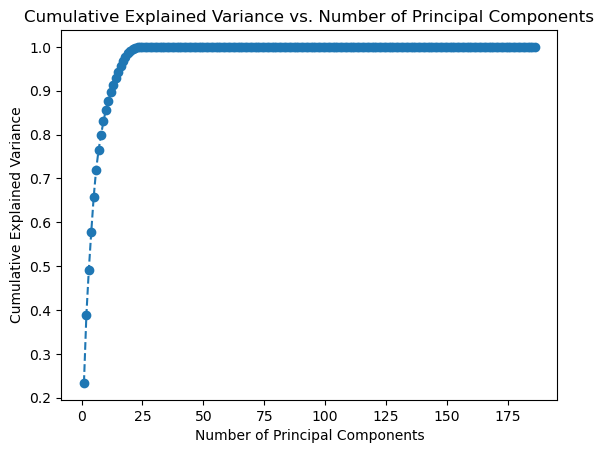

In [64]:
# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = explained_variance.cumsum()

import matplotlib.pyplot as plt
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

## Number of components

In [67]:
# Choose the number of components (e.g., n_components=3)
n_components = 5

# Transform the data to the selected number of components
reduced_data = pca.transform(standardized_data)[:, :n_components]

# Create a DataFrame with the reduced data
reduced_df = pd.DataFrame(data=reduced_data, columns=[f'PC{i}' for i in range(1, n_components + 1)])
reduced_df

,PC1,PC2,PC3,PC4,PC5
0,7.585377,-6.505487,-7.442191,-4.809326,6.450050
1,7.574287,-6.513818,-7.422348,-4.816900,6.447660
2,7.573623,-6.514317,-7.421159,-4.817354,6.447517
3,7.580077,-6.509468,-7.432708,-4.812945,6.448908
4,7.587976,-6.503534,-7.446842,-4.807551,6.450610
...,...,...,...,...,...
617227,-8.357190,-3.278330,2.171122,-0.051968,0.946797
617228,-8.359414,-3.280000,2.175101,-0.053487,0.946317
617229,-8.360324,-3.280684,2.176728,-0.054108,0.946121
617230,-8.360324,-3.280684,2.176728,-0.054108,0.946121
